In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import pandas as pd
from matplotlib import pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv("season_comps.csv")
df

,File Name,Area,Perimeter,Center of Mass (X),Center of Mass (Y),Skewness (X),Skewness (Y),Elongation,Equivalent Diameter,Compactness,Roundness,Eccentricity,Deviation from Circle
0,season_grids\KILX20200601_171444_V06.nc,152.5,109.296463,96,280,0.023510,0.004469,1.250000,13.934455,6.233508,0.160423,1.237183,0.043546
1,season_grids\KILX20200601_171922_V06.nc,192.0,115.195958,101,279,0.029894,0.004799,1.526316,15.635280,5.500009,0.181818,1.652990,0.022373
2,season_grids\KILX20200601_173319_V06.nc,254.5,195.178713,115,275,0.041922,0.013057,1.541667,18.001096,11.911522,0.083952,1.485470,0.024556
3,season_grids\KILX20200601_181948_V06.nc,172.0,101.396968,159,255,0.031203,0.001754,1.250000,14.798554,4.756764,0.210227,1.470806,0.036197
4,season_grids\KILX20200601_183106_V06.nc,187.0,99.882250,172,249,0.043504,0.004506,1.705882,15.430353,4.245464,0.235546,1.857598,0.003848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,season_grids\KILX20200721_172612_V06.nc,3359.5,1159.006263,260,232,0.001728,0.122053,0.496774,65.402204,31.819039,0.031428,2.411320,0.035926
1195,season_grids\KILX20200721_180948_V06.nc,1606.5,327.119838,287,240,0.000481,0.482171,0.479452,45.226755,5.300577,0.188659,1.848174,0.002792
1196,season_grids\KILX20200721_182143_V06.nc,1635.5,340.634557,289,231,0.001048,1.148836,0.320000,45.633138,5.645690,0.177126,2.202416,0.028384
1197,season_grids\KILX20200721_183835_V06.nc,245.5,101.840620,294,285,0.002789,0.016786,0.483871,17.679941,3.361868,0.297454,1.589250,0.003038


### Transform the data </br>

Standarize the data using the StandardScaler function. </br>
</br>
To account for variations in measurements units and scale, it is common practice prior to machine learning to standardize the data. </br>
</br>
This is done by taking the feature, and subtractin the mean of that feature from the values, and then dividing by the feature's standard deviation.</br>
</br>
This process can be influenced by outliers (anomalous points) within the data, so it is essential that these are identified and dealt with prior to this step.

In [31]:
df.describe()

,Area,Perimeter,Center of Mass (X),Center of Mass (Y),Skewness (X),Skewness (Y),Elongation,Equivalent Diameter,Compactness,Roundness,Eccentricity,Deviation from Circle
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,700.332360,230.163423,156.636364,168.265221,1.009910,0.794135,1.215577,25.277179,7.338102,0.177727,2.140090,0.351811
std,1254.495458,245.082422,93.699451,85.549640,5.306971,4.554256,0.704010,15.904907,4.757840,0.083369,0.865217,1.403615
min,128.500000,59.455844,2.000000,2.000000,0.000016,0.000010,0.195652,12.791063,1.770856,0.017199,1.001202,0.000094
25%,201.500000,114.175143,60.000000,95.000000,0.004908,0.004119,0.739130,16.017421,4.382941,0.113879,1.521500,0.026760
50%,305.500000,149.539104,171.000000,184.000000,0.018770,0.016329,1.090909,19.722441,6.001356,0.166629,1.965017,0.062726
75%,571.000000,227.572111,238.000000,245.000000,0.091124,0.085343,1.516016,26.963294,8.781289,0.228158,2.511158,0.146329
max,12161.500000,2623.517139,296.000000,297.000000,93.371772,65.507780,7.500000,124.436742,58.144286,0.564699,8.595654,19.212189


In [32]:
scaler = StandardScaler()

We then fit the standard to the data, and then transform our data using that scaler.

In [33]:
df[['Area','Perimeter','Center of Mass (X)','Center of Mass (Y)', 'Skewness (X)',
    'Skewness (Y)','Elongation', 'Equivalent Diameter', 'Compactness', 'Roundness',
    'Eccentricity', 'Deviation from Circle']] = scaler.fit_transform(df[['Area','Perimeter','Center of Mass (X)','Center of Mass (Y)', 'Skewness (X)',
    'Skewness (Y)','Elongation', 'Equivalent Diameter', 'Compactness', 'Roundness',
    'Eccentricity', 'Deviation from Circle']])

In [34]:
df

,File Name,Area,Perimeter,Center of Mass (X),Center of Mass (Y),Skewness (X),Skewness (Y),Elongation,Equivalent Diameter,Compactness,Roundness,Eccentricity,Deviation from Circle
0,season_grids\KILX20200601_171444_V06.nc,-0.436878,-0.493374,-0.647407,1.306626,-0.185946,-0.173463,0.048916,-0.713456,-0.232260,-0.207645,-1.043997,-0.219714
1,season_grids\KILX20200601_171922_V06.nc,-0.405378,-0.469293,-0.594022,1.294932,-0.184743,-0.173391,0.441568,-0.606475,-0.386490,0.049088,-0.563215,-0.234805
2,season_grids\KILX20200601_173319_V06.nc,-0.355536,-0.142806,-0.444546,1.248156,-0.182475,-0.171577,0.463382,-0.457665,0.961640,-1.125290,-0.756912,-0.233248
3,season_grids\KILX20200601_181948_V06.nc,-0.421327,-0.525620,0.025236,1.014276,-0.184496,-0.174060,0.048916,-0.659105,-0.542770,0.389994,-0.773867,-0.224951
4,season_grids\KILX20200601_183106_V06.nc,-0.409365,-0.531803,0.164036,0.944112,-0.182177,-0.173455,0.696737,-0.619364,-0.650280,0.693814,-0.326635,-0.248008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,season_grids\KILX20200721_172612_V06.nc,2.120595,3.791502,1.103601,0.745314,-0.190052,-0.147634,-1.021438,2.523861,5.147536,-1.755580,0.313614,-0.225144
1195,season_grids\KILX20200721_180948_V06.nc,0.722638,0.395772,1.391876,0.838866,-0.190287,-0.068528,-1.046054,1.254827,-0.428424,0.131177,-0.337531,-0.248761
1196,season_grids\KILX20200721_182143_V06.nc,0.745764,0.450939,1.413230,0.733620,-0.190181,0.077916,-1.272639,1.280388,-0.355859,-0.007211,0.072065,-0.230520
1197,season_grids\KILX20200721_183835_V06.nc,-0.362713,-0.523809,1.466614,1.365096,-0.189852,-0.170758,-1.039774,-0.477866,-0.836071,1.436706,-0.636915,-0.248585


### Clustering the Data (2 Variables)


#### Identifying Optimum Number of Clusters
There are a number of ways to identify the optimum number of clusters. The method we are going to look at below is known as the Elbow method.</br>
</br>
The Elbow plot allows us to plot the inertia, which is a measure of how well the data was clustered by the K-Means algorithm, against the number of clusters. From this plot, we are looking for a point where the inertia begins to slow.

In [35]:
# Create a function to work out optimum number of clusters

def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    # Generate the elbow plot
    fig = plt.subplots(figsize = (10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

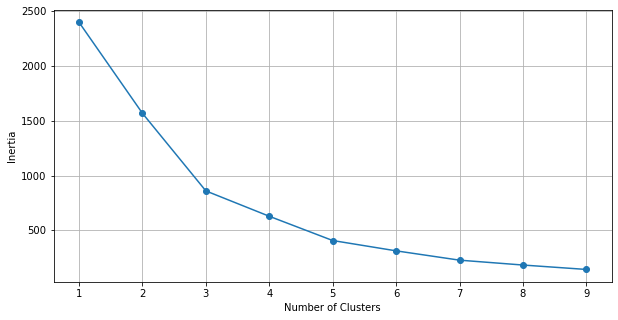

In [36]:
optimise_k_means(df[['Compactness', 'Deviation from Circle']], 10)

### Applying K Means Clustering

In [37]:
kmeans = KMeans(n_clusters=4)

In [38]:
kmeans.fit(df[['Compactness','Deviation from Circle']])

KMeans(n_clusters=4)

In [39]:
df['kmeans_3'] = kmeans.labels_

In [40]:
df

,File Name,Area,Perimeter,Center of Mass (X),Center of Mass (Y),Skewness (X),Skewness (Y),Elongation,Equivalent Diameter,Compactness,Roundness,Eccentricity,Deviation from Circle,kmeans_3
0,season_grids\KILX20200601_171444_V06.nc,-0.436878,-0.493374,-0.647407,1.306626,-0.185946,-0.173463,0.048916,-0.713456,-0.232260,-0.207645,-1.043997,-0.219714,2
1,season_grids\KILX20200601_171922_V06.nc,-0.405378,-0.469293,-0.594022,1.294932,-0.184743,-0.173391,0.441568,-0.606475,-0.386490,0.049088,-0.563215,-0.234805,2
2,season_grids\KILX20200601_173319_V06.nc,-0.355536,-0.142806,-0.444546,1.248156,-0.182475,-0.171577,0.463382,-0.457665,0.961640,-1.125290,-0.756912,-0.233248,0
3,season_grids\KILX20200601_181948_V06.nc,-0.421327,-0.525620,0.025236,1.014276,-0.184496,-0.174060,0.048916,-0.659105,-0.542770,0.389994,-0.773867,-0.224951,2
4,season_grids\KILX20200601_183106_V06.nc,-0.409365,-0.531803,0.164036,0.944112,-0.182177,-0.173455,0.696737,-0.619364,-0.650280,0.693814,-0.326635,-0.248008,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,season_grids\KILX20200721_172612_V06.nc,2.120595,3.791502,1.103601,0.745314,-0.190052,-0.147634,-1.021438,2.523861,5.147536,-1.755580,0.313614,-0.225144,3
1195,season_grids\KILX20200721_180948_V06.nc,0.722638,0.395772,1.391876,0.838866,-0.190287,-0.068528,-1.046054,1.254827,-0.428424,0.131177,-0.337531,-0.248761,2
1196,season_grids\KILX20200721_182143_V06.nc,0.745764,0.450939,1.413230,0.733620,-0.190181,0.077916,-1.272639,1.280388,-0.355859,-0.007211,0.072065,-0.230520,2
1197,season_grids\KILX20200721_183835_V06.nc,-0.362713,-0.523809,1.466614,1.365096,-0.189852,-0.170758,-1.039774,-0.477866,-0.836071,1.436706,-0.636915,-0.248585,2


### Plotting the Results

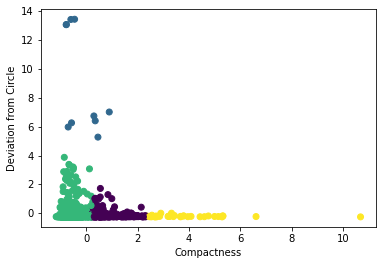

In [41]:
plt.scatter(x=df['Compactness'], y=df['Deviation from Circle'], c=df['kmeans_3'])
plt.xlabel('Compactness')
plt.ylabel('Deviation from Circle')
plt.show()

#### Creating Multiple Clusters

In [42]:
for k in range(1,6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Compactness','Deviation from Circle']])
    df[f'KMeans_{k}'] = kmeans.labels_

In [43]:
df

,File Name,Area,Perimeter,Center of Mass (X),Center of Mass (Y),Skewness (X),Skewness (Y),Elongation,Equivalent Diameter,Compactness,Roundness,Eccentricity,Deviation from Circle,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
0,season_grids\KILX20200601_171444_V06.nc,-0.436878,-0.493374,-0.647407,1.306626,-0.185946,-0.173463,0.048916,-0.713456,-0.232260,-0.207645,-1.043997,-0.219714,2,0,0,0,0,0
1,season_grids\KILX20200601_171922_V06.nc,-0.405378,-0.469293,-0.594022,1.294932,-0.184743,-0.173391,0.441568,-0.606475,-0.386490,0.049088,-0.563215,-0.234805,2,0,0,0,0,0
2,season_grids\KILX20200601_173319_V06.nc,-0.355536,-0.142806,-0.444546,1.248156,-0.182475,-0.171577,0.463382,-0.457665,0.961640,-1.125290,-0.756912,-0.233248,0,0,0,1,3,1
3,season_grids\KILX20200601_181948_V06.nc,-0.421327,-0.525620,0.025236,1.014276,-0.184496,-0.174060,0.048916,-0.659105,-0.542770,0.389994,-0.773867,-0.224951,2,0,0,0,0,0
4,season_grids\KILX20200601_183106_V06.nc,-0.409365,-0.531803,0.164036,0.944112,-0.182177,-0.173455,0.696737,-0.619364,-0.650280,0.693814,-0.326635,-0.248008,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,season_grids\KILX20200721_172612_V06.nc,2.120595,3.791502,1.103601,0.745314,-0.190052,-0.147634,-1.021438,2.523861,5.147536,-1.755580,0.313614,-0.225144,3,0,0,1,2,4
1195,season_grids\KILX20200721_180948_V06.nc,0.722638,0.395772,1.391876,0.838866,-0.190287,-0.068528,-1.046054,1.254827,-0.428424,0.131177,-0.337531,-0.248761,2,0,0,0,0,0
1196,season_grids\KILX20200721_182143_V06.nc,0.745764,0.450939,1.413230,0.733620,-0.190181,0.077916,-1.272639,1.280388,-0.355859,-0.007211,0.072065,-0.230520,2,0,0,0,0,0
1197,season_grids\KILX20200721_183835_V06.nc,-0.362713,-0.523809,1.466614,1.365096,-0.189852,-0.170758,-1.039774,-0.477866,-0.836071,1.436706,-0.636915,-0.248585,2,0,0,0,0,0


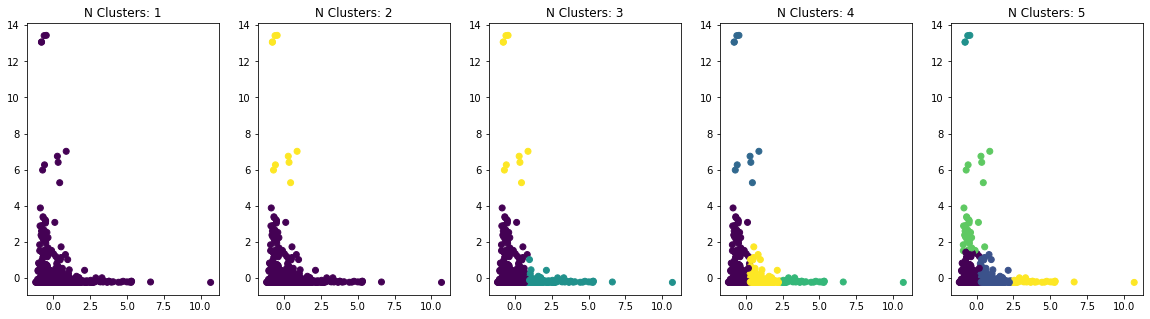

In [44]:
fig, axs = plt.subplots(nrows=1, ncols = 5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['Compactness'], y=df['Deviation from Circle'], c=df[f'KMeans_{i}'])
    ax.set_title(f'N Clusters: {i}')

### Applying to more data (Elongation vs. Roundness)

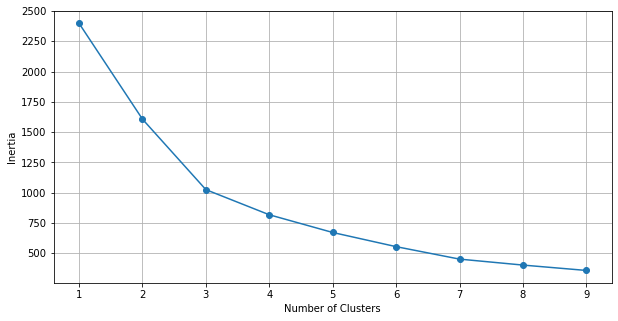

In [45]:
optimise_k_means(df[['Elongation', 'Roundness']], 10)

In [46]:
kmeans = KMeans(n_clusters=4)

In [47]:
kmeans.fit(df[['Elongation','Roundness']])

KMeans(n_clusters=4)

In [48]:
df['kmeans_3'] = kmeans.labels_

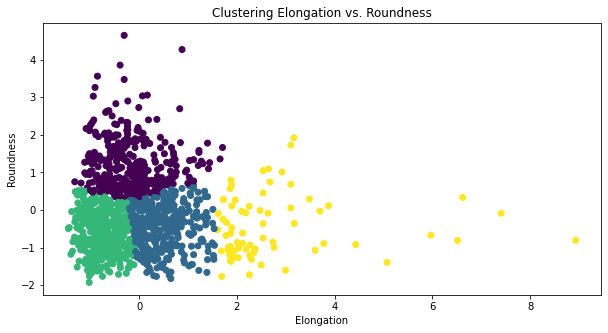

In [49]:
fig = plt.subplots(figsize = (10,5))
plt.scatter(x=df['Elongation'], y=df['Roundness'], c=df['kmeans_3'])
plt.xlabel('Elongation')
plt.ylabel('Roundness')
plt.title('Clustering Elongation vs. Roundness')
plt.show()

### Elongation vs. Compactness

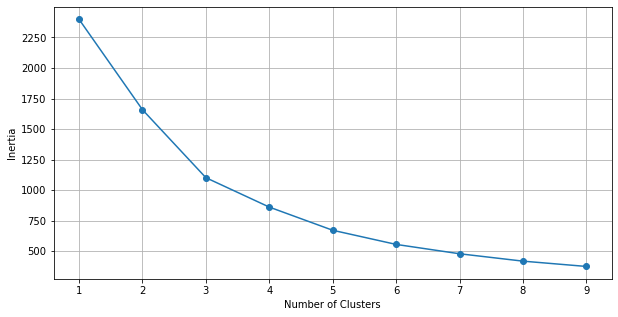

In [50]:
optimise_k_means(df[['Elongation', 'Compactness']], 10)

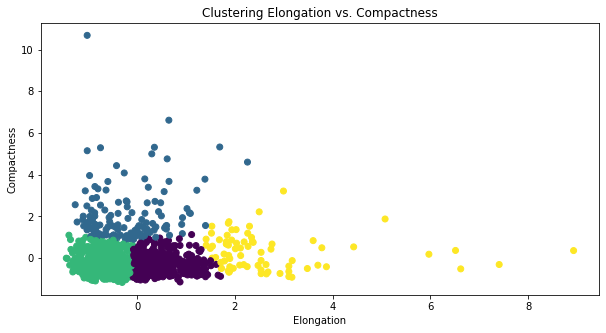

In [51]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(df[['Elongation','Compactness']])

df['kmeans_3'] = kmeans.labels_

fig = plt.subplots(figsize = (10,5))
plt.scatter(x=df['Elongation'], y=df['Compactness'], c=df['kmeans_3'])
plt.xlabel('Elongation')
plt.ylabel('Compactness')
plt.title('Clustering Elongation vs. Compactness')
plt.show()

### Skewness (X) vs. Skewness (Y)

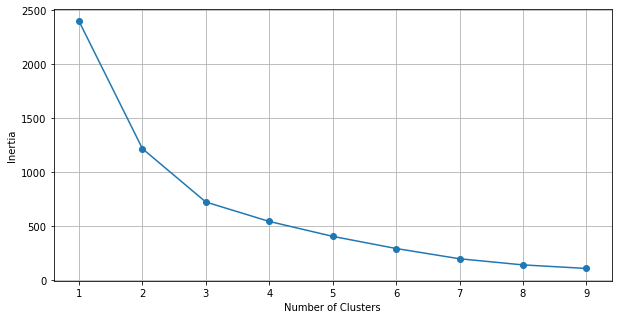

In [52]:
optimise_k_means(df[['Skewness (X)', 'Skewness (Y)']], 10)

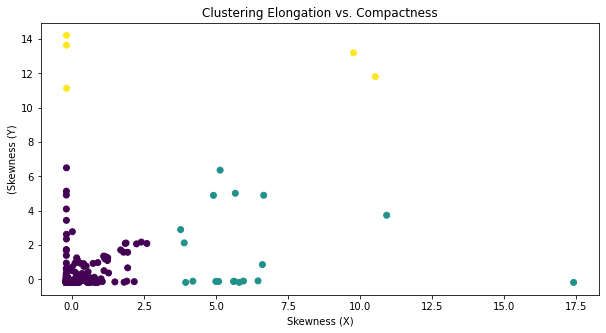

In [53]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(df[['Skewness (X)','Skewness (Y)']])

df['kmeans_3'] = kmeans.labels_

fig = plt.subplots(figsize = (10,5))
plt.scatter(x=df['Skewness (X)'], y=df['Skewness (Y)'], c=df['kmeans_3'])
plt.xlabel('Skewness (X)')
plt.ylabel('(Skewness (Y)')
plt.title('Clustering Elongation vs. Compactness')
plt.show()

### Eccentricity vs. Elongation

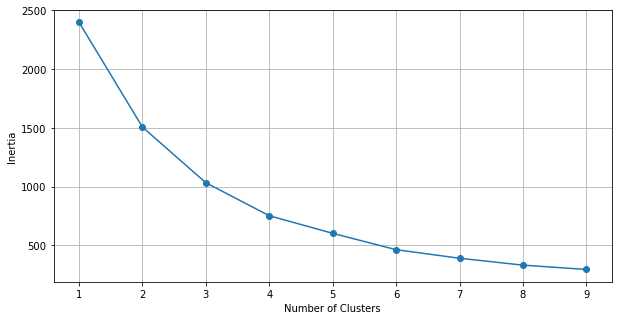

In [55]:
optimise_k_means(df[['Elongation', 'Eccentricity']], 10)

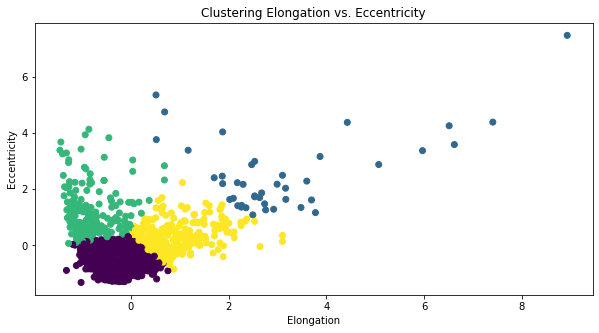

In [58]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(df[['Elongation','Eccentricity']])

df['kmeans_3'] = kmeans.labels_

fig = plt.subplots(figsize = (10,5))
plt.scatter(x=df['Elongation'], y=df['Eccentricity'], c=df['kmeans_3'])
plt.xlabel('Elongation')
plt.ylabel('Eccentricity')
plt.title('Clustering Elongation vs. Eccentricity')
plt.show()

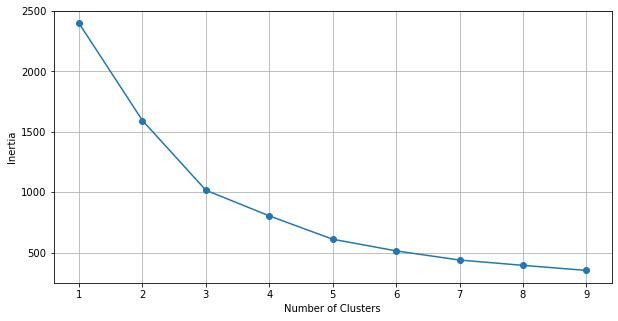

In [59]:
optimise_k_means(df[['Compactness', 'Eccentricity']], 10)

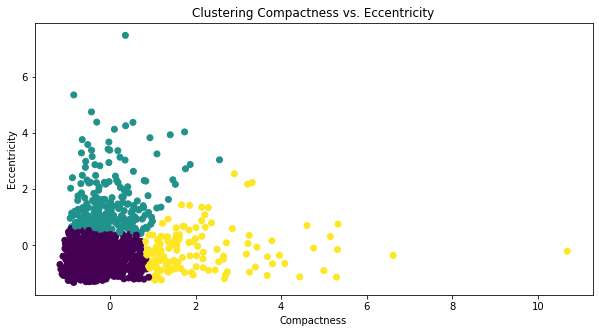

In [60]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(df[['Compactness','Eccentricity']])

df['kmeans_3'] = kmeans.labels_

fig = plt.subplots(figsize = (10,5))
plt.scatter(x=df['Compactness'], y=df['Eccentricity'], c=df['kmeans_3'])
plt.xlabel('Compactness')
plt.ylabel('Eccentricity')
plt.title('Clustering Compactness vs. Eccentricity')
plt.show()

### Center of Mass (X) vs. Skewness (X)

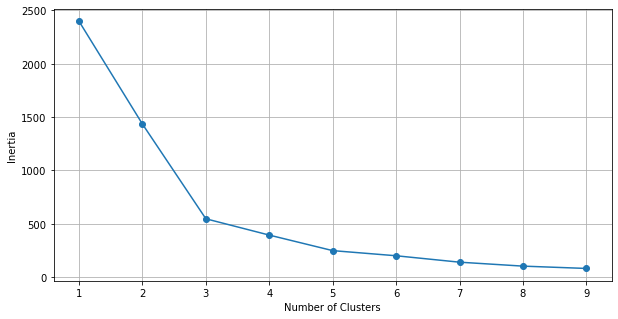

In [61]:
optimise_k_means(df[['Center of Mass (X)', 'Skewness (X)']], 10)

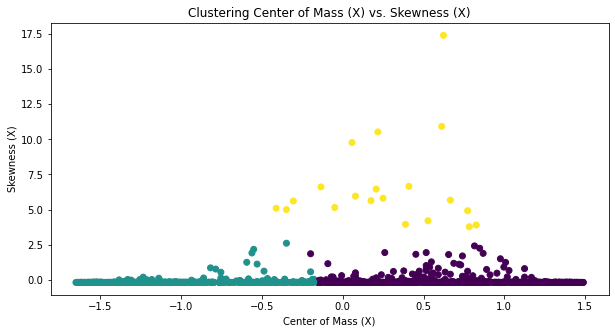

In [62]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(df[['Center of Mass (X)','Skewness (X)']])

df['kmeans_3'] = kmeans.labels_

fig = plt.subplots(figsize = (10,5))
plt.scatter(x=df['Center of Mass (X)'], y=df['Skewness (X)'], c=df['kmeans_3'])
plt.xlabel('Center of Mass (X)')
plt.ylabel('Skewness (X)')
plt.title('Clustering Center of Mass (X) vs. Skewness (X)')
plt.show()

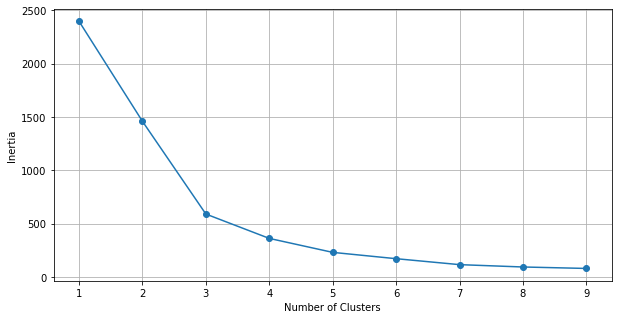

In [63]:
optimise_k_means(df[['Center of Mass (Y)', 'Skewness (Y)']], 10)

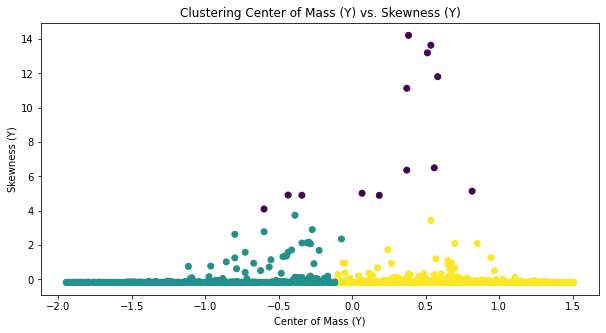

In [ ]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(df[['Center of Mass (Y)','Skewness (Y)']])

df['kmeans_3'] = kmeans.labels_

fig = plt.subplots(figsize = (10,5))
plt.scatter(x=df['Center of Mass (Y)'], y=df['Skewness (Y)'], c=df['kmeans_3'])
plt.xlabel('Center of Mass (Y)')
plt.ylabel('Skewness (Y)')
plt.title('Clustering Center of Mass (Y) vs. Skewness (Y)')
plt.show()

### Equivalent Diameter vs. Deviation from Circle

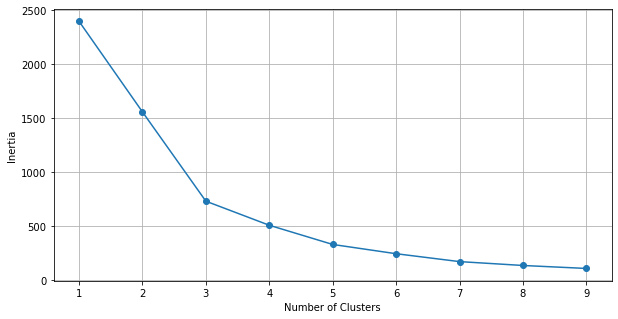

In [66]:
optimise_k_means(df[['Equivalent Diameter', 'Deviation from Circle']], 10)

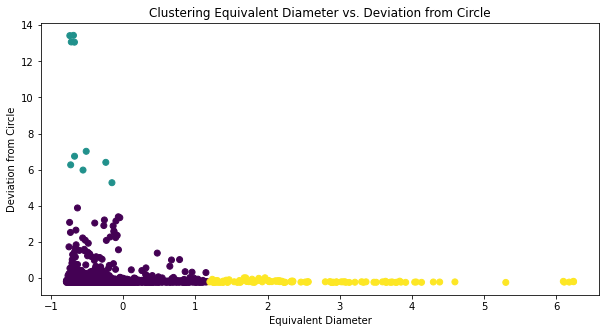

In [68]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(df[['Equivalent Diameter','Deviation from Circle']])

df['kmeans_3'] = kmeans.labels_

fig = plt.subplots(figsize = (10,5))
plt.scatter(x=df['Equivalent Diameter'], y=df['Deviation from Circle'], c=df['kmeans_3'])
plt.xlabel('Equivalent Diameter')
plt.ylabel('Deviation from Circle')
plt.title('Clustering Equivalent Diameter vs. Deviation from Circle')
plt.show()